ソフトマックス交差エントロピー誤差関数: [ 1.16012561]


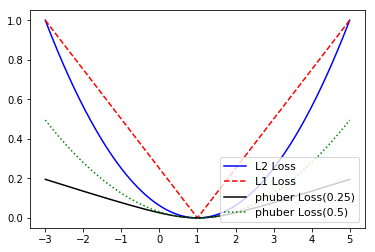

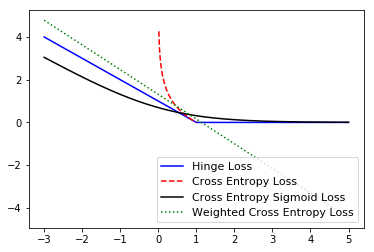

In [18]:
import numpy as np
import tensorflow as tf
import tensorboard_jupyter as tb
import matplotlib.pyplot as plt

sess = tf.Session()

# 0を目的値として-1から1までの値を作成する
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

##  回帰のための損失関数 ##

# L2ノルムの損失関数。二乗誤差。
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)
# tf.nn.l2_lossは上記の半分の値となる

# L1ノルムの損失関数。差の絶対値。
# 外れ値にはうまく対応するが、目的値に対してなめらかでないためアルゴリズムが収束しないことがある
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

# Pseudo-Huber損失関数。L1とL2の長所を活かした関数。
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1),
                tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2),
                tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)


##  分類のための損失関数 ##

# 1を目的値として-3から5までの値を作成する
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500], 1.)

# ヒンジ損失関数。主にSVMで使用される
# 正解値からの距離を表す
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

# 交差エントロピー損失関数（ロジスティック関数）
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

# シグモイド交差エントロピー損失関数
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

# 重み付き交差エントロピー誤差関数
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

# ソフトマックス交差エントロピー誤差関数
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=target_dist)
print('ソフトマックス交差エントロピー誤差関数:', sess.run(softmax_entropy))

x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-', label='phuber Loss(0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='phuber Loss(0.5)')
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss')
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

tf.summary.FileWriter('./log/', sess.graph)
tb.show_graph(tf.get_default_graph().as_graph_def())